In [1]:
# Import statement
from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

In [2]:
# Load the MNIST data
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print('train_x dimensions: ' + str(train_x.shape))
print('train_y dimensions: ' + str(train_y.shape))
print('test_x dimensions:  '  + str(test_x.shape))
print('test_y dimensions:  '  + str(test_y.shape))

train_x dimensions: (60000, 28, 28)
train_y dimensions: (60000,)
test_x dimensions:  (10000, 28, 28)
test_y dimensions:  (10000,)


In [3]:
# Reshape image into column vector
n_train = train_x.shape[0]
n_test = test_x.shape[0]
m = train_x.shape[1] * train_x.shape[2] 
train_X = train_x.reshape((n_train, m)).T
test_X = test_x.reshape((n_test, m)).T
print('train_X dimensions: ' + str(train_X.shape))
print('test_X dimensions: '  + str(test_X.shape))
X = np.hstack((train_X, test_X))
print('X dimensions: ' + str(X.shape))
Y = np.hstack((train_y, test_y))
print('Y dimensions: ' + str(Y.shape))

train_X dimensions: (784, 60000)
test_X dimensions: (784, 10000)
X dimensions: (784, 70000)
Y dimensions: (70000,)


In [4]:
# SVD analysis
U, S, Vt = linalg.svd(X, full_matrices=False)

In [6]:
print('U dimensions: ' + str(U.shape))
print('VT dimensions: '  + str(Vt.shape))

U dimensions: (784, 784)
VT dimensions: (784, 70000)


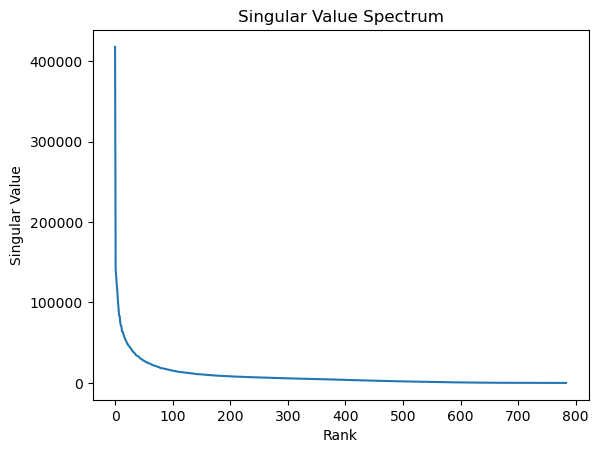

In [7]:
# Plot singular value spectrum
r = np.arange(S.shape[0])
plt.figure()
plt.title('Singular Value Spectrum')
plt.plot(r, S)
plt.ylabel('Singular Value')
plt.xlabel('Rank')
plt.show()

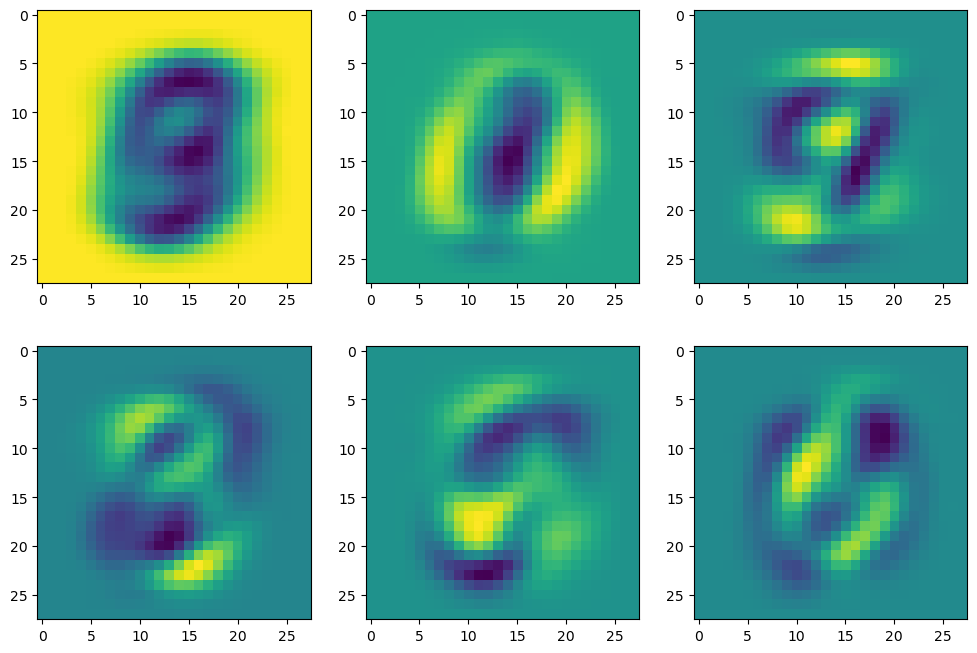

In [9]:
# Matrix U is a 784 by 784 matrix where the columns represent the orthonormal basis or 
# principal components of the data matrix
# Matrix Sigma is 784 by 784 diagonal matrix that contain the singular values which scale the vectors in matrix U
# ordered in descending order
# Matrix
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    img = U[:,i].reshape((28,28))
    plt.imshow(img)
plt.show()

In [79]:
# Project data onto the columns 2,3 and 5
k = np.array([2,3,5]) - 1
X_proj = np.diag(S)@Vt
X_proj = X_proj[k,:]
print(X_proj.shape)

(3, 70000)


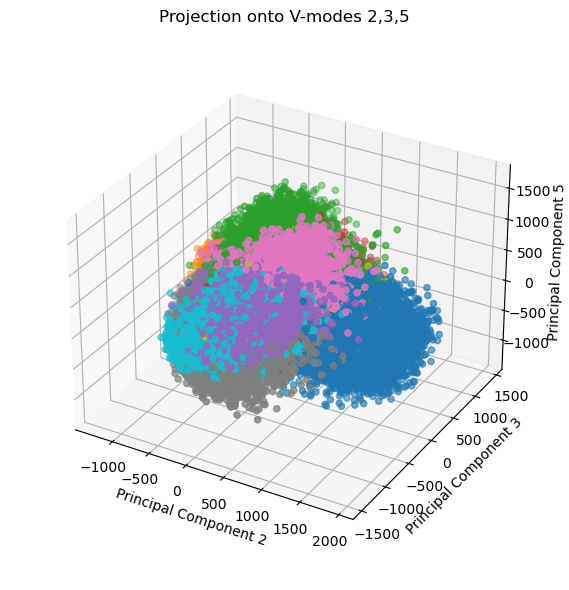

In [86]:
# 3D plot the projected data with each digit having different color
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
c_map = [colors[i] for i in Y]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
ax.set_title('Projection onto V-modes 2,3,5')
ax.scatter(X_proj[0,:], X_proj[1,:], X_proj[2,:], c=c_map)
ax.set_xlabel('Principal Component 2')
ax.set_ylabel('Principal Component 3')
ax.set_zlabel('Principal Component 5')
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()
plt.show()

In [87]:
# Function to prepare data for a two digits classifier
def get_2digits(x, y, d1, d2):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2]
    X = x[index,:]
    Y = y[index]
    #Y = np.array([1 if y == 1 else -1 for y in Y])
    return X, Y

# Function to prepare data for a three digits classifier
def get_3digits(x, y, d1, d2, d3):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2 or y[i] == d3]
    X = x[index,:]
    Y = y[index]
    return X, Y

In [126]:
# Project onto top 100 principal components
k = 200
train_xp = train_X.T@U[:,:k]
test_xp = test_X.T@U[:,:k]
print(train_xp.shape)
print(test_xp.shape)

(60000, 200)
(10000, 200)


In [101]:
#Fit the LDA model to classify two digits (1, 8)
train_x2, train_y2 = get_2digits(train_xp, train_y, 1, 8)
test_x2, test_y2 = get_2digits(test_xp, test_y, 1, 8)

model = LinearDiscriminantAnalysis()
model.fit(train_x2, train_y2)
y_pred = model.predict(test_x2)
acc = accuracy_score(test_y2, y_pred)
print('Two digits Classification (1,8) Accuracy:', acc)

Two digits Classification (1,8) Accuracy: 0.9800853485064012


In [102]:
#Fit the LDA model to classify three digits (1,4,8)
train_x3, train_y3 = get_3digits(train_xp, train_y, 1, 3, 8)
test_x3, test_y3 = get_3digits(test_xp, test_y, 1, 3, 8)
model = LinearDiscriminantAnalysis()
model.fit(train_x3, train_y3)
y_pred = model.predict(test_x3)
acc = accuracy_score(test_y3, y_pred)
print('Three digits Classification (1,4,8) Accuracy:', acc)

Three digits Classification (1,4,8) Accuracy: 0.9618467457518436


In [103]:
#Fit the LDA model to classify all digits
model = LinearDiscriminantAnalysis()
model.fit(train_xp, train_y)
y_pred = model.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Classification Accuracy:', acc)

Classification Accuracy: 0.8766


In [104]:
# Find accuracy of speration for all two digits pair
# Generate all unique pairs
pairs = []
for i in range(10):
    for j in range(10):
        if (i,j) not in pairs and (j,i) not in pairs and i != j:
            pairs.append((i,j))
print(pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [113]:
# Compute accuracy of LDA for all digits pair
acc_arr = []
for pair in pairs:
    train_x2, train_y2 = get_2digits(train_xp, train_y, pair[0], pair[1])
    test_x2, test_y2 = get_2digits(test_xp, test_y, pair[0], pair[1])
    model = LinearDiscriminantAnalysis()
    model.fit(train_x2, train_y2)
    y_pred = model.predict(test_x2)
    acc_arr.append(accuracy_score(test_y2, y_pred))
print(acc_arr)

[0.9971631205673759, 0.9865805168986084, 0.9954773869346734, 0.9969418960244648, 0.9893162393162394, 0.9886480908152735, 0.9925298804780877, 0.9897645854657113, 0.9909502262443439, 0.9843101061375173, 0.993006993006993, 0.9971658006613132, 0.9935865811544153, 0.9961777353081701, 0.9893666204345816, 0.9800853485064012, 0.9944029850746269, 0.9769833496571988, 0.9791459781529295, 0.9792099792099792, 0.9763819095477387, 0.9786407766990292, 0.9680957128614157, 0.9828515433610975, 0.9934738955823293, 0.9679284963196635, 0.9954268292682927, 0.9808635917566242, 0.9621975806451613, 0.9801882119861317, 0.9903948772678762, 0.9896907216494846, 0.9840796019900497, 0.9902862985685071, 0.9522852837769965, 0.9756756756756757, 0.9895833333333334, 0.9523043944265809, 0.9831667543398211, 0.9979859013091642, 0.9875776397515528, 0.99644128113879, 0.983016983016983, 0.9612174766813942, 0.9752899646999496]


In [116]:
# Find two digits that 
acc_arr = np.array(acc_arr)
index = np.argsort(acc_arr)
min_index = index[0]
max_index = index[-1]
print('Digits pair most difficult to separate', pairs[min_index], 'accuracy:', acc_arr[min_index])
print('Digits pair most easy to separate', pairs[max_index], 'accuracy:', acc_arr[max_index])

Digits pair most difficult to separate (4, 9) accuracy: 0.9522852837769965
Digits pair most easy to separate (6, 7) accuracy: 0.9979859013091642


In [132]:
# SVM Classifier on all digits
clf = SVC()
clf.fit(train_xp, train_y)
y_pred = clf.predict(train_xp)
acc = accuracy_score(train_y, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Testing Accuracy:', acc)

Training Accuracy: 0.9870833333333333
Testing Accuracy: 0.9778


In [131]:
# Decision Tree Classifier on all digits
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_xp, train_y)
y_pred = clf.predict(train_xp)
acc = accuracy_score(train_y, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Testing Accuracy:', acc)

Training Accuracy: 1.0
Testing Accuracy: 0.8376


In [136]:
# Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair of digits to separate

train_x2_min, train_y2_min = get_2digits(train_xp, train_y, pairs[min_index][0], pairs[min_index][1])
test_x2_min, test_y2_min = get_2digits(test_xp, test_y, pairs[min_index][0], pairs[min_index][1])

train_x2_max, train_y2_max = get_2digits(train_xp, train_y, pairs[max_index][0], pairs[max_index][1])
test_x2_max, test_y2_max = get_2digits(test_xp, test_y, pairs[max_index][0], pairs[max_index][1])

print('Digits pair most difficult to separate', pairs[min_index])
print('SVM Classification')
clf = SVC()
clf = clf.fit(train_x2_min, train_y2_min)
y_pred = clf.predict(train_x2_min)
acc = accuracy_score(train_y2_min, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_min)
acc = accuracy_score(test_y2_min, y_pred)
print('Testing Accuracy:', acc)

print('Decision Tree Classification')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x2_min, train_y2_min)
y_pred = clf.predict(train_x2_min)
acc = accuracy_score(train_y2_min, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_min)
acc = accuracy_score(test_y2_min, y_pred)
print('Testing Accuracy:', acc)
print()

print('Digits pair most easy to separate', pairs[max_index])
print('SVM Classification')
clf = SVC()
clf = clf.fit(train_x2_max, train_y2_max)
y_pred = clf.predict(train_x2_max)
acc = accuracy_score(train_y2_max, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_max)
acc = accuracy_score(test_y2_max, y_pred)
print('Testing Accuracy:', acc)

print('Decision Tree Classification')
clf = clf.fit(train_x2_max, train_y2_max)
y_pred = clf.predict(train_x2_max)
acc = accuracy_score(train_y2_max, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_max)
acc = accuracy_score(test_y2_max, y_pred)
print('Testing Accuracy:', acc)

Digits pair most difficult to separate (4, 9)
SVM Classification
Training Accuracy: 0.9927063014163345
Testing Accuracy: 0.987945755901557
Decision Tree Classification
Training Accuracy: 1.0
Testing Accuracy: 0.9005524861878453

Digits pair most easy to separate (6, 7)
SVM Classification
Training Accuracy: 0.9998358368218009
Testing Accuracy: 0.998992950654582
Decision Tree Classification
Training Accuracy: 0.9998358368218009
Testing Accuracy: 0.998992950654582
